In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [319]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [320]:
# rename feature names
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'label']
display(df)

,variance,skewness,curtosis,entropy,label
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [321]:
# change datatype of label to string
df['label'] = df['label'].astype(str)

In [322]:
df.describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


In [323]:
feature_list = ['variance', 'skewness', 'curtosis', 'entropy']

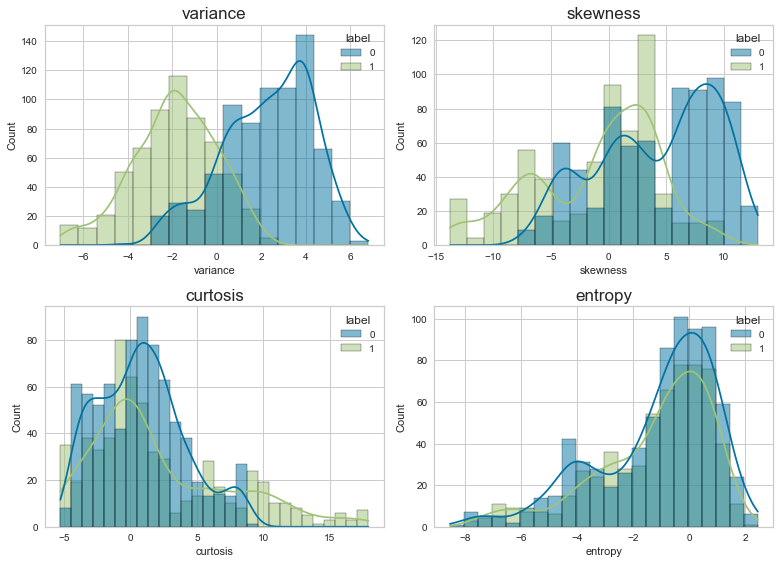

In [324]:
fig = plt.figure(tight_layout=True, figsize=(11, 8))
for i, feature in enumerate(feature_list):
    plt.subplot(2, 2, i+1)
    plt.title(feature, fontsize=17)
    sns.histplot(data=df, x=feature, kde=True, hue='label')
plt.show()

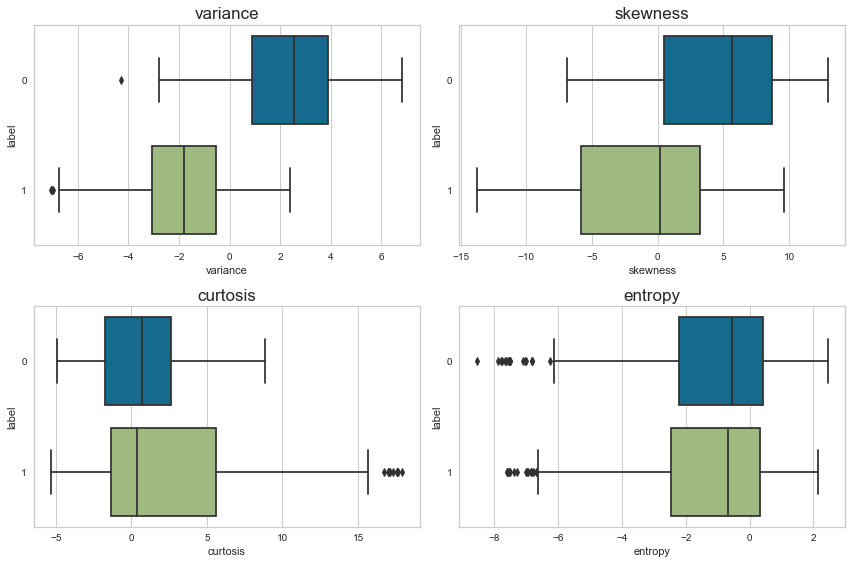

In [325]:
fig = plt.figure(tight_layout=True, figsize=(12, 8))
for i, feature in enumerate(feature_list):
    plt.subplot(2, 2, i+1)
    plt.title(feature, fontsize=17)
    sns.boxplot(data=df, x=feature, y='label')
plt.show()

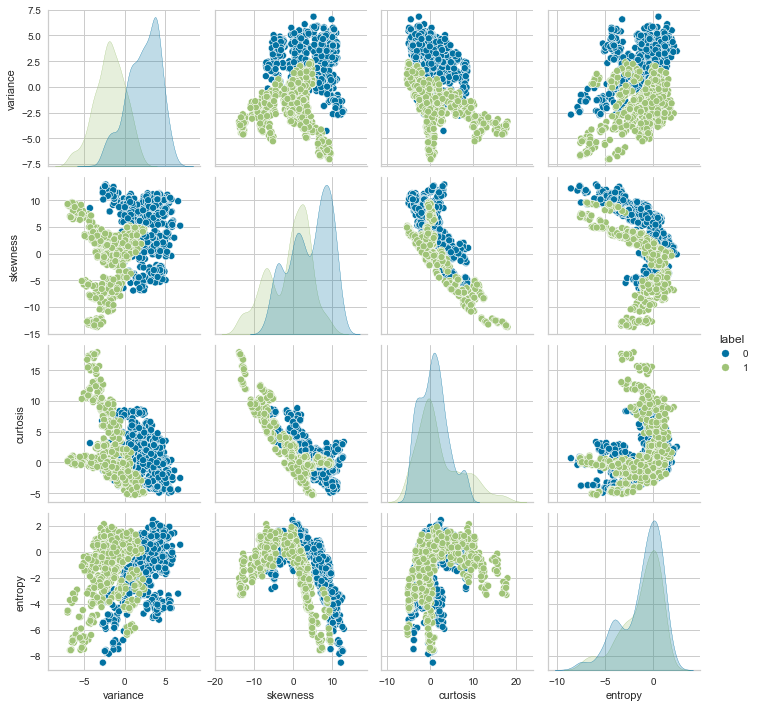

In [326]:
sns.pairplot(df, hue='label')
plt.show()

In [347]:
fig = px.scatter_3d(df, x='variance', y='skewness', z='curtosis', color='label')
fig.show()

In [328]:
df_clean = df.drop(['entropy'], axis=1)

In [329]:
features_to_scale = ['variance', 'skewness', 'curtosis']

# using minmax scaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_clean[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# using standard scaler 
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_clean[features_to_scale])
# scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

In [330]:
scaled_df.describe()

,variance,skewness,curtosis
count,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924
std,0.205003,0.219611,0.185669
min,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869
50%,0.543617,0.602168,0.254280
75%,0.711304,0.770363,0.364674
max,1.000000,1.000000,1.000000


In [331]:
scaled_df['label'] = df['label']

In [332]:
scaled_df.head()

,variance,skewness,curtosis,label
0,0.769004,0.839643,0.106783,0
1,0.835659,0.820982,0.121804,0
2,0.786629,0.416648,0.310608,0
3,0.757105,0.871699,0.054921,0
4,0.531578,0.348662,0.424662,0


In [333]:
kmeans_data = scaled_df.drop(['label'], axis=1)
kmeans_data.head()

,variance,skewness,curtosis
0,0.769004,0.839643,0.106783
1,0.835659,0.820982,0.121804
2,0.786629,0.416648,0.310608
3,0.757105,0.871699,0.054921
4,0.531578,0.348662,0.424662


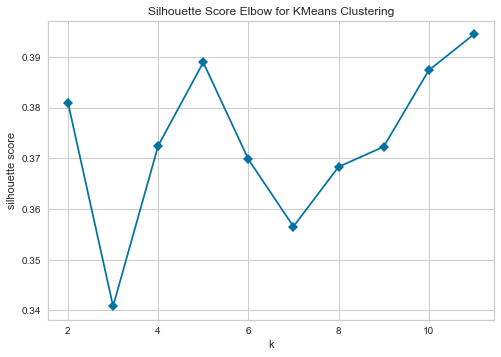

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [334]:
kmeans_sil = KMeans(max_iter=1000, random_state=48)
visualizer = KElbowVisualizer(kmeans_sil, k=(2,12), metric='silhouette', timings=False, locate_elbow=False)
visualizer.fit(kmeans_data)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

In [335]:
kmeans = KMeans(random_state=48, max_iter=1000, n_clusters=2)
kmeans.fit(kmeans_data)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=kmeans_data.columns)
cluster_labels = pd.DataFrame(kmeans.labels_, columns=['clusters'])
clusters_df = pd.concat([kmeans_data, cluster_labels], axis=1)

fig = px.scatter_3d(clusters_df, x='variance', y='skewness', z='curtosis', color='clusters')
fig.show()

In [336]:
silhouette_score(kmeans_data, kmeans.labels_)

0.3809314755590718

In [337]:
fig = go.Figure(data =[go.Scatter3d(
        x=clusters_df['variance'], 
        y=clusters_df['skewness'], 
        z=clusters_df['curtosis'],
        mode='markers',
        marker=dict(color=clusters_df['clusters'],
                opacity=0.1,
            )),
    ])

fig.add_trace(
    go.Scatter3d(x=centroids_df['variance'],
                 y=centroids_df['skewness'],
                 z=centroids_df['curtosis'],
                 mode='markers')
)

# # set opacity of markers
# fig.data[0].marker.opacity = 0.5
# fig.data[1].marker.opacity = 0.5


fig.show()

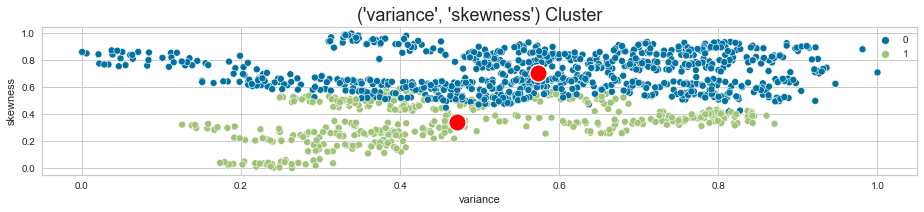

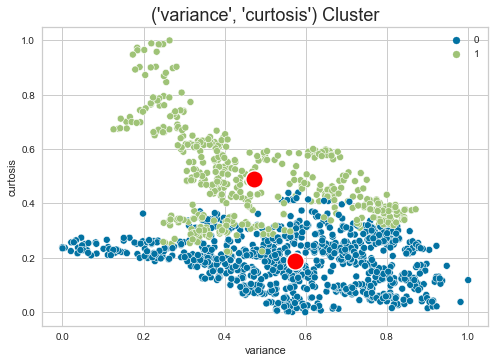

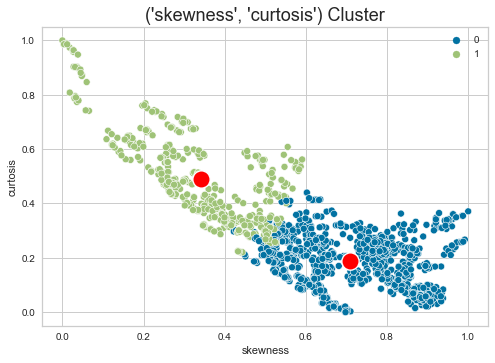

In [338]:
# plot each combination of 2 features
feature_list = ['variance', 'skewness', 'curtosis']
fig = plt.figure(tight_layout=True, figsize=(13, 8))
from itertools import combinations

i = 0
for combo in combinations(feature_list, 2):
    ax = fig.add_subplot(3, 1, i+1)
    ax = sns.scatterplot(data=clusters_df, x=combo[0], y=combo[1], hue='clusters')
    ax = sns.scatterplot(data=centroids_df, x=combo[0], y=combo[1], s=300, color='red')
    ax.set_title(f'{combo} Cluster', fontsize=18)
    plt.show()
    i += 1

# with variance and skewness only

In [339]:
kmeans_data2 = kmeans_data.drop(['curtosis'], axis=1)
kmeans_data2.head()

,variance,skewness
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


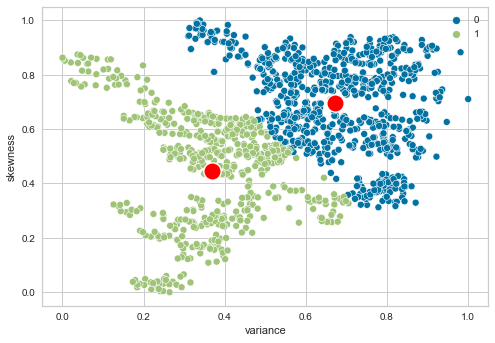

In [340]:
kmeans = KMeans(random_state=48, max_iter=1000, n_clusters=2)
kmeans.fit(kmeans_data2)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=kmeans_data2.columns)
cluster_labels = pd.DataFrame(kmeans.labels_, columns=['clusters'])
clusters_df = pd.concat([kmeans_data2, cluster_labels], axis=1)

sns.scatterplot(data=clusters_df, x='variance', y='skewness', hue='clusters')
sns.scatterplot(data=centroids_df, x='variance', y='skewness', s=300, color='red')
# title(f'{combo} Cluster', fontsize=18)
plt.show()

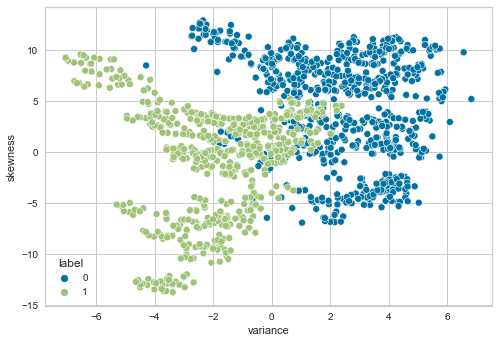

In [341]:
sns.scatterplot(data=df, x='variance', y='skewness', hue='label')
plt.show()